# EDA

This notebook will explore news text feature in our dataset.
- Clean data
- Exploring different features and their comparison before and after clean
- Comparing unigram, bigram and trigram before and after clean
- Save cleaned data as for input to ML model.

# 1)- Importing key Modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
import pandas as pd
import numpy as np
import requests
import pickle

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2-Loading Dataset

In [4]:
train = pd.read_csv('train_data_10000.csv')
train=train.rename(columns={'Unnamed: 0':'random_columns'}) 
train=train.drop(["random_columns"], axis=1)
train.shape

(10000, 2)

In [5]:
train.head(2)

,news,category
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,e
1,Vessyl Bottle Tracks Your Drink And Its Health...,t


# 3- Basic feature extraction 
- Number of words
- Number of characters
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of uppercase words

### 3.1. Number of words
One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is to understand headline pattern of particular news.

To do this, we simply use the split function

In [6]:
train['word_count'] = train['news'].apply(lambda x: len(str(x).split(" ")))

In [7]:
train.head()

,news,category,word_count
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,e,17
1,Vessyl Bottle Tracks Your Drink And Its Health...,t,10
2,Conjoined twins to leave Dallas hospital month...,m,14
3,Did Lorde get married in Vegas? Royals singer ...,e,17
4,Free HIV testing available Thursday afternoon ...,m,9


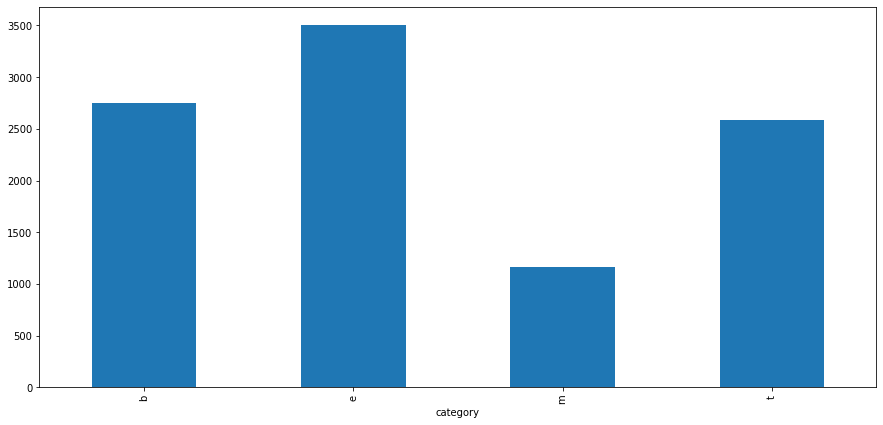

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['category']).count()['word_count'].plot(kind="bar",ax=ax)

We can see that entertainment headlines consume most words in our data.

### 3.2.Number of characters
This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each headline(space, special character included). This is done by calculating the length of the news headlines.

In [7]:
train['char_count'] = train['news'].str.len() ## this also includes spaces
train[['news','category','char_count']].head()

,news,category,char_count
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,e,102
1,Vessyl Bottle Tracks Your Drink And Its Health...,t,68
2,Conjoined twins to leave Dallas hospital month...,m,88
3,Did Lorde get married in Vegas? Royals singer ...,e,95
4,Free HIV testing available Thursday afternoon ...,m,70


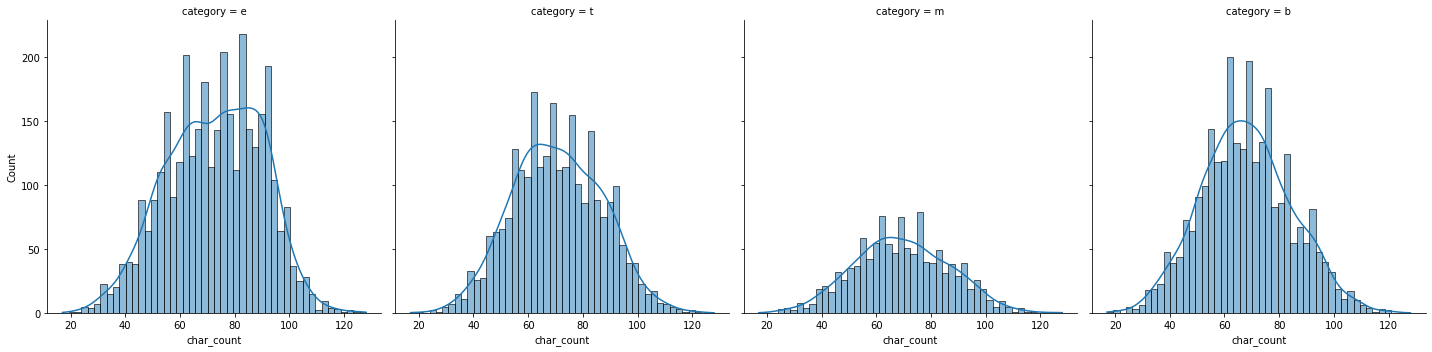

In [10]:
sns.displot(x="char_count", col="category", data=train, kde=True);

It is sanity check. Results are consistent with word. There are no exceptional long characters in our data.

### 3.3.Number of stopwords
Some examples are "the, is, at, which, and, on"

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['news'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['news','category','stopwords']].head()

,news,category,stopwords
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,e,2
1,Vessyl Bottle Tracks Your Drink And Its Health...,t,0
2,Conjoined twins to leave Dallas hospital month...,m,4
3,Did Lorde get married in Vegas? Royals singer ...,e,2
4,Free HIV testing available Thursday afternoon ...,m,1


Stopwords are more like noise. Less is better. It is difficult to analyze why some category may have higher stopwords. But, it sure gives us idea which category may contain noise and hence requires attention in cleaning phase.

### 3.4.Number of special characters
- examples are hashtags or @ , # etc
- Use of the ‘starts with’ function because hashtags (or mentions) appear at the beginning of a word.

In [10]:
train['hastags'] = train['news'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['news','hastags']].head()

,news,hastags
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,0
1,Vessyl Bottle Tracks Your Drink And Its Health...,0
2,Conjoined twins to leave Dallas hospital month...,0
3,Did Lorde get married in Vegas? Royals singer ...,0
4,Free HIV testing available Thursday afternoon ...,0


In [11]:
train[['news','hastags']].tail()

,news,hastags
9995,Yelp Reports A Profit For The First Time Since...,0
9996,"Facebook violated FTC order, EPIC says, news f...",0
9997,A&E Orders Third Season of 'Bates Motel'Variety,0
9998,30 percent of the world is now fatWKRC TV Cinc...,0
9999,Sleep Apnea Linked To Hearing ImpairmentUniver...,0


There are no special character found atleast in some of random example. For detailed analysis, we need to develop a close rule based method to find special characters in news (if even found).

### 3.5.Number of numerics/digits

In [12]:
train['numerics'] = train['news'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['news','numerics']].head()

,news,numerics
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,1
1,Vessyl Bottle Tracks Your Drink And Its Health...,0
2,Conjoined twins to leave Dallas hospital month...,0
3,Did Lorde get married in Vegas? Royals singer ...,0
4,Free HIV testing available Thursday afternoon ...,0


In [13]:
train[['news','numerics']].tail()

,news,numerics
9995,Yelp Reports A Profit For The First Time Since...,0
9996,"Facebook violated FTC order, EPIC says, news f...",0
9997,A&E Orders Third Season of 'Bates Motel'Variety,0
9998,30 percent of the world is now fatWKRC TV Cinc...,1
9999,Sleep Apnea Linked To Hearing ImpairmentUniver...,0


Numbers are noise in NLP. Though it is argued that they provide context and make understanding for humans such as we may expect numerics and digits in business news alot. But, machine does not learn like humans. So, digits do not make much sense the way machines learn especially in this classification problem. Exceptions are there !

### 3.6.Number of Uppercase words

In [14]:
train['upper'] = train['news'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['news','upper']].head()

,news,upper
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,1
1,Vessyl Bottle Tracks Your Drink And Its Health...,0
2,Conjoined twins to leave Dallas hospital month...,0
3,Did Lorde get married in Vegas? Royals singer ...,0
4,Free HIV testing available Thursday afternoon ...,1


Upper case also do not make much value for us. We will use lower case for our analysis.

# 4-Basic Text Pre-processing aka cleaning

- Lower casing
- Punctuation removal
- Stopwords removal
- Frequent words removal
- Rare words removal
- Tokenization
- Stemming
- Lemmatization

### 4.1.Lower case

In [15]:
train['clean'] = train['news'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [16]:
train[['news','clean']].head()

,news,clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,top 5 reasons why 'divergent' star kate winsle...
1,Vessyl Bottle Tracks Your Drink And Its Health...,vessyl bottle tracks your drink and its health...
2,Conjoined twins to leave Dallas hospital month...,conjoined twins to leave dallas hospital month...
3,Did Lorde get married in Vegas? Royals singer ...,did lorde get married in vegas? royals singer ...
4,Free HIV testing available Thursday afternoon ...,free hiv testing available thursday afternoon ...


### 4.2)-Removing Punctuation¶
removing em will help us reduce the size

In [17]:
train['clean'] = train['clean'].str.replace('[^\w\s]','')
train[['news','clean']].head()

,news,clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,top 5 reasons why divergent star kate winslet ...
1,Vessyl Bottle Tracks Your Drink And Its Health...,vessyl bottle tracks your drink and its health...
2,Conjoined twins to leave Dallas hospital month...,conjoined twins to leave dallas hospital month...
3,Did Lorde get married in Vegas? Royals singer ...,did lorde get married in vegas royals singer f...
4,Free HIV testing available Thursday afternoon ...,free hiv testing available thursday afternoon ...


In [18]:
import string
import re

def clean_more(text):
    ''' remove text in square brackets, remove punctuation and remove words containing numbers if anyleft by now.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean_pun = lambda x: clean_more(x)

In [19]:
train['clean'] = train.clean.apply(clean_pun)
train[['news','clean']].head()

,news,clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,top reasons why divergent star kate winslet d...
1,Vessyl Bottle Tracks Your Drink And Its Health...,vessyl bottle tracks your drink and its health...
2,Conjoined twins to leave Dallas hospital month...,conjoined twins to leave dallas hospital month...
3,Did Lorde get married in Vegas? Royals singer ...,did lorde get married in vegas royals singer f...
4,Free HIV testing available Thursday afternoon ...,free hiv testing available thursday afternoon ...


In [20]:
len(train.news[0])

102

In [21]:
len(train.clean[0])

95

We can see difference in length. This will save alot of computing wastage in model training step.

### 4.3.Removal of Stop Words

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [23]:
train['clean'] = train['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train[['news','clean']].head()

,news,clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,top reasons divergent star kate winslet deserv...
1,Vessyl Bottle Tracks Your Drink And Its Health...,vessyl bottle tracks drink health benefitsgadg...
2,Conjoined twins to leave Dallas hospital month...,conjoined twins leave dallas hospital months s...
3,Did Lorde get married in Vegas? Royals singer ...,lorde get married vegas royals singer fools fa...
4,Free HIV testing available Thursday afternoon ...,free hiv testing available thursday afternoon ...


In [24]:
print(len(train.news[0]))
print(len(train.clean[0]))

102
85


With punctuation cleaning, we had 95. Now we have 85 and this is only one sample. 

In [25]:
train.news[3]

'Did Lorde get married in Vegas? Royals singer fools her fans inside Little White  ...Daily Mail'

In [26]:
train.clean[3]

'lorde get married vegas royals singer fools fans inside little white daily mail'

### 4.4.Common words

In [27]:
# let’s check the 10 most frequently occurring words in our text data
freq_clean = pd.Series(' '.join(train['clean']).split()).value_counts()[:10]
freq_clean

news        998
new         654
times       522
blog        440
us          421
business    317
daily       315
post        296
google      267
first       219
dtype: int64

In [28]:
# let’s check the 10 most frequently occurring words in our text data
freq_news = pd.Series(' '.join(train['news']).split()).value_counts()[:10]
freq_news

to      1999
in      1357
of      1251
for      974
News     950
the      916
and      812
on       739
The      565
a        541
dtype: int64

This is to show how much effective is our cleaning process so far. We can find more valuable terms in cleaned data now.

Since these words are valueable so, I decide NOT to remove them. If there were still some useless tokens then an action could be taken.

### 4.5.Rare words

In [29]:
rare_clean = pd.Series(' '.join(train['clean']).split()).value_counts()[-10:]
rare_clean

signups                  1
declineaction            1
sundaycbs                1
loomstruckinginfo        1
vulnerabilitiessocial    1
graham                   1
innovates                1
received                 1
singaporeindia           1
inccom                   1
dtype: int64

In [30]:
rare_news = pd.Series(' '.join(train['news']).split()).value_counts()[-10:]
rare_news

EUR-ComplexAction         1
customization,            1
camerasTelegraph.co.uk    1
Experimental              1
revises                   1
programBaystreet.ca       1
video:                    1
considering               1
Invented                  1
RPT-UPDATE                1
dtype: int64

Rare words in clean column looks valuable. We can always come back if we find to cleaning later.

### 4.6.Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences.

In [31]:
from textblob import TextBlob
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
TextBlob(train['clean'][1]).words

WordList(['vessyl', 'bottle', 'tracks', 'drink', 'health', 'benefitsgadget', 'review'])

In [33]:
TextBlob(train['news'][1]).words

WordList(['Vessyl', 'Bottle', 'Tracks', 'Your', 'Drink', 'And', 'Its', 'Health', 'BenefitsGadget', 'Review'])

### 4.7)-Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
from textblob import Word
train['clean'] = train['clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train[['news','clean']].head()

,news,clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,top reason divergent star kate winslet deserve...
1,Vessyl Bottle Tracks Your Drink And Its Health...,vessyl bottle track drink health benefitsgadge...
2,Conjoined twins to leave Dallas hospital month...,conjoined twin leave dallas hospital month sep...
3,Did Lorde get married in Vegas? Royals singer ...,lorde get married vega royal singer fool fan i...
4,Free HIV testing available Thursday afternoon ...,free hiv testing available thursday afternoon ...


# 5- Comparision of Feature extraction for original vs clean Data 

In [36]:
train.columns

Index(['news', 'category', 'word_count', 'char_count', 'stopwords', 'hastags',
       'numerics', 'upper', 'clean'],
      dtype='object')

### 5.1)-Number of words

In [37]:
train['word_count_clean'] = train['clean'].apply(lambda x: len(str(x).split(" ")))
train[['news','word_count','clean','word_count_clean']].head()

,news,word_count,clean,word_count_clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,17,top reason divergent star kate winslet deserve...,12
1,Vessyl Bottle Tracks Your Drink And Its Health...,10,vessyl bottle track drink health benefitsgadge...,7
2,Conjoined twins to leave Dallas hospital month...,14,conjoined twin leave dallas hospital month sep...,8
3,Did Lorde get married in Vegas? Royals singer ...,17,lorde get married vega royal singer fool fan i...,13
4,Free HIV testing available Thursday afternoon ...,9,free hiv testing available thursday afternoon ...,8


### 5.2)-Number of characters

In [38]:
train['char_count_clean'] = train['clean'].str.len()
train[['news','char_count','clean','char_count_clean']].head()

,news,char_count,clean,char_count_clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,102,top reason divergent star kate winslet deserve...,83
1,Vessyl Bottle Tracks Your Drink And Its Health...,68,vessyl bottle track drink health benefitsgadge...,54
2,Conjoined twins to leave Dallas hospital month...,88,conjoined twin leave dallas hospital month sep...,60
3,Did Lorde get married in Vegas? Royals singer ...,95,lorde get married vega royal singer fool fan i...,75
4,Free HIV testing available Thursday afternoon ...,70,free hiv testing available thursday afternoon ...,66


### 5.3)-Number of Stopwords

In [39]:
train['stopwords_clean'] = train['clean'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['news','stopwords','clean','stopwords_clean']].head()

,news,stopwords,clean,stopwords_clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,2,top reason divergent star kate winslet deserve...,0
1,Vessyl Bottle Tracks Your Drink And Its Health...,0,vessyl bottle track drink health benefitsgadge...,0
2,Conjoined twins to leave Dallas hospital month...,4,conjoined twin leave dallas hospital month sep...,0
3,Did Lorde get married in Vegas? Royals singer ...,2,lorde get married vega royal singer fool fan i...,0
4,Free HIV testing available Thursday afternoon ...,1,free hiv testing available thursday afternoon ...,0


I didn't work alot on special character so, their comparison is excluded.

### 5.4)-Number of numerics/digits

In [40]:
train['numerics_clean'] = train['clean'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['news','numerics','clean','numerics_clean']].head()

,news,numerics,clean,numerics_clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,1,top reason divergent star kate winslet deserve...,0
1,Vessyl Bottle Tracks Your Drink And Its Health...,0,vessyl bottle track drink health benefitsgadge...,0
2,Conjoined twins to leave Dallas hospital month...,0,conjoined twin leave dallas hospital month sep...,0
3,Did Lorde get married in Vegas? Royals singer ...,0,lorde get married vega royal singer fool fan i...,0
4,Free HIV testing available Thursday afternoon ...,0,free hiv testing available thursday afternoon ...,0


### 5.5)-Number of Uppercase words

In [41]:
train['upper_clean'] = train['clean'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['news','upper','clean','upper_clean']].head()

,news,upper,clean,upper_clean
0,Top 5 Reasons Why 'Divergent' Star Kate Winsle...,1,top reason divergent star kate winslet deserve...,0
1,Vessyl Bottle Tracks Your Drink And Its Health...,0,vessyl bottle track drink health benefitsgadge...,0
2,Conjoined twins to leave Dallas hospital month...,0,conjoined twin leave dallas hospital month sep...,0
3,Did Lorde get married in Vegas? Royals singer ...,0,lorde get married vega royal singer fool fan i...,0
4,Free HIV testing available Thursday afternoon ...,1,free hiv testing available thursday afternoon ...,0


# 6- Token nature

Unigram , Bigram, Trigram

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
# for dynamic visuals
import plotly as py
import cufflinks as cf
# for offline mode in notebook
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

6.a.Uni-grams

In [46]:
def freq_unigram(x,n):
        vec = CountVectorizer(). fit(x)
        bow = vec.transform(x)
        sum_words = bow.sum(axis=0)
        words_freq = [(word , sum_words[0 , idx]) for word , idx in vec.vocabulary_.items()]
        words_freq = sorted (words_freq , key=lambda x:x[1], reverse=True)
        return words_freq[:n]

In [47]:
freqwords=freq_unigram(train['news'], 20)
df_unigram=pd.DataFrame(freqwords, columns=['freq_unigrams','count'])
df_unigram= df_unigram.set_index('freq_unigrams')
df_unigram

,count
freq_unigrams,
to,2335
the,1814
in,1663
of,1498
com,1316
for,1208
news,1035
on,948
and,948


In [48]:
# ploting 
df_unigram.iplot(kind='bar',xTitle='Number of Unigram', yTitle='Count',
                title='Top 20 unigram words before data cleaning')

In [49]:
freqwords=freq_unigram(train['clean'], 20)
df_unigram_cln=pd.DataFrame(freqwords, columns=['freq_unigrams','count'])
df_unigram_cln= df_unigram_cln.set_index('freq_unigrams')
df_unigram_cln

,count
freq_unigrams,
news,998
new,654
time,615
blog,443
business,325
post,320
daily,315
google,301
star,256


In [50]:
# ploting 
df_unigram_cln.iplot(kind='bar',xTitle='Number of Unigram after clean', yTitle='Count',
                title='Top 20 unigram words after data cleaning')

### 6.b.Bi-grams

In [51]:
def freq_bigram(x,n):
        vec = CountVectorizer(ngram_range=(2,2)). fit(x)
        bow = vec.transform(x)
        sum_words = bow.sum(axis=0)
        words_freq = [(word , sum_words[0 , idx]) for word , idx in vec.vocabulary_.items()]
        words_freq = sorted (words_freq , key=lambda x:x[1], reverse=True)
        return words_freq[:n]

In [52]:
freq_bigram=freq_bigram(train['news'], 20)
df_bigram=pd.DataFrame(freq_bigram, columns=['freq_bigrams','count'])
df_bigram= df_bigram.set_index('freq_bigrams')
df_bigram

,count
freq_bigrams,
of the,142
in the,119
business times,118
to be,104
on the,96
samsung galaxy,96
game of,88
of thrones,86
co uk,82


In [53]:
df_bigram.iplot(kind='bar',xTitle='Number of bigram', yTitle='Count',
                title='Top 20 bigram words before data cleaning')

In [54]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(train['clean'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Bigram' , 'count'])
df3.groupby('Bigram').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',xTitle='Number of Bigrams', yTitle='count', title='Top 20 Bigram words after data cleaning')

business time 118
samsung galaxy 93
game throne 83
press release 79
daily news 79
miley cyrus 66
new york 65
kim kardashian 63
angeles time 55
street journal 55
international business 52
business journal 49
star war 47
kanye west 45
justin bieber 45
time au 43
daily mail 43
journal blog 42
google glass 38
gas price 36


### 4.c. plot using Trigram

In [55]:

def freq_trigram(x,n):
        vec = CountVectorizer(ngram_range=(3,3)). fit(x)
        bow = vec.transform(x)
        sum_words = bow.sum(axis=0)
        words_freq = [(word , sum_words[0 , idx]) for word , idx in vec.vocabulary_.items()]
        words_freq = sorted (words_freq , key=lambda x:x[1], reverse=True)
        return words_freq[:n]

In [56]:
freq_trigram_wrds=freq_trigram(train['news'], 20)
df_trigram=pd.DataFrame(freq_trigram_wrds, columns=['freq_trigrams','count'])
df_trigram= df_trigram.set_index('freq_trigrams')
df_trigram

,count
freq_trigrams,
game of thrones,84
international business times,57
business times au,43
samsung galaxy s5,39
dancing with the,29
york daily news,28
business times uk,26
with the stars,26
street journal blog,25


In [57]:
# ploting 
df_trigram.iplot(kind='bar',xTitle='Number of trigram', yTitle='Count',
                title='Top 20 trigram words before data cleaning')

In [58]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(train['clean'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['trigrams' , 'count'])
df5.groupby('trigrams').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Number of Trigrams', yTitle='count',title='Top 20 Trigram words after data cleaning')

international business time 49
business time au 43
york daily news 28
business time uk 26
street journal blog 25
star war episode 23
kim kardashian kanye 23
kardashian kanye west 23
malay mail online 22
samsung galaxy tab 18
samsung galaxy note 17
headline global news 16
captain america winter 15
xmen day future 15
business journal blog 15
jose mercury news 15
war episode vii 14
game throne season 14
wayne journal gazette 13
day future past 13


It is more easy to perform model budiling part since I have got a good idea of text feature data i.e news and categorical feature i.e category. EDA is always a good practice though it takes chunk of time.